[[-2.]
 [-1.]
 [-1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 5.]
 [ 5.]
 [ 4.]
 [ 6.]
 [ 6.]
 [ 7.]
 [ 6.]
 [ 6.]
 [10.]
 [10.]
 [12.]
 [10.]
 [10.]
 [10.]
 [ 9.]
 [ 7.]
 [ 6.]
 [ 6.]
 [ 4.]
 [ 3.]
 [ 6.]
 [ 3.]
 [ 5.]
 [ 4.]
 [ 2.]
 [ 3.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 3.]
 [ 2.]
 [ 2.]
 [ 3.]]


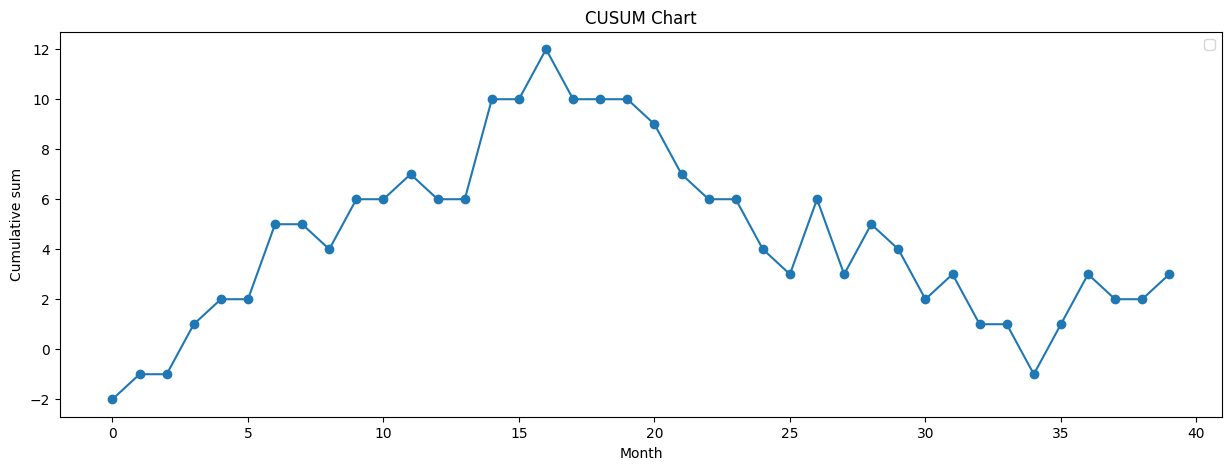

In [5]:
# Cumulative Sum (CUSUM) is one of the most powerful management tools available for the detection of trends and slight changes but persistent in data.
# CUSUM uses all the information available since begining of monitoring of process
# This python code creates CUSUM chart for monitoring number of minor accidents in a large organization
# Chapter 9, Statistical Process Control By John Oakland

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from google.colab import files
#uploaded = files.upload()

#import io
#data = pd.read_csv(io.BytesIO(uploaded['example2_exercise7.csv']))

# data from process that is in statistical control
xlsx = pd.ExcelFile("/content/Table 9.1.xlsx")
data = pd.read_excel(xlsx, 'Sheet2',header=None)

data = np.array(data)
data = data[:,1]
data = data.reshape(len(data),1)
#print(data)

xmean = np.mean(data)
xmean = np.array(xmean, dtype=int)
#print(xmean)

sub_mean = data - xmean
sub_mean = np.array(sub_mean, dtype=int)
sub_mean.reshape(len(data),1)
#sub_mean = list(sub_mean)
#print((np.array(sub_mean,dtype=int)))

x0 = sub_mean[0]
cusum1 = np.zeros((len(sub_mean),1))
cusum1[0,:] = x0
#print(cusum1)

for i in range(1,len(sub_mean)):
  xx = cusum1[i-1,:] + sub_mean[i,:]
  cusum1[i,:] = xx

print(cusum1)

plt.figure(figsize=(15,5))
plt.plot(cusum1,'-o')
plt.xlabel("Month")
plt.ylabel("Cumulative sum")
plt.legend()
# displaying the title
plt.title("CUSUM Chart")
plt.show()

#The interpretation of cusum charts is concerned with the assessment of gradients or slopes of graphs
# the cusum slope is upwards, the observations are above target;
# the cusum slope is downwards, the observations are below target;
#the cusum slope is horizontal, the observations are on target;
#the cusum slope changes, the observations are changing level;
# the absolute value of the cusum score has little meaning.

